In [1]:
#import statements
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import MeanShift

import time
import timeit 
import math
from scipy.spatial import distance

%load_ext line_profiler
%load_ext memory_profiler

In [2]:
rotten = pd.read_csv("rotten_tomatoes_movies_Mark.csv", sep=',')
print(rotten.head())

                     rotten_tomatoes_link  \
0                              /m/0814255   
1                              /m/0878835   
2                                   /m/10   
3                 /m/1000013-12_angry_men   
4  /m/1000079-20000_leagues_under_the_sea   

                                         movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                          movie_info  \
0  A teenager discovers he's the descendant of a ...   
1  Kate has a lot on her mind. There's the ethics...   
2  Blake Edwards' 10 stars Dudley Moore as George...   
3  A Puerto Rican youth is on trial for murder, a...   
4  This 1954 Disney version of Jules Verne's 20,0...   

                                   critics_consensus  \

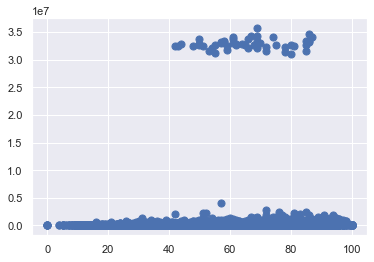

In [3]:
plt.scatter(rotten["audience_rating"], rotten["audience_count"], s=50, cmap="spring")

In [4]:
#make mean shifting function


def meanshifting(groupdata_np, r, flag, rate):
    #groupdata is all the point in a single group
    #r is the radius of the window
    
    
    #starting center
    
    
    rows = groupdata_np.shape[0]
    index = np.random.choice(rows, size=1, replace=False) 
    center = groupdata_np[index[0],:]
 
    
    
    center_np = np.zeros((2000, 2))
    center_np[0,:] = center
   
    
    #looping through the process a set number of times
    for val in range(2000):
        
        #calculating distances between center point and other points and placing them in new group
        
        close_groupx = []
        close_groupy = []
        
        
        
        #looping through num of data points
        
        for ind in range(len(groupdata_np[:,0])):
            #finding dists and sorting ones closest
           
            a = center[0] - groupdata_np[ind, 0]
            b = center[1] - groupdata_np[ind, 1]
            
          
            dist = math.sqrt((a**2) + (b**2))
          
            if dist <= r:
                close_groupx.append(groupdata_np[ind,0])
                close_groupy.append(groupdata_np[ind,1])
                
       
        close_group_mean = np.zeros(2)        
        close_group_mean[0] = np.mean(close_groupx)                       
        close_group_mean[1] = np.mean(close_groupy)
        
      
        if close_group_mean[0] == center[0] and close_group_mean[1] == center[1]:
            break
            
        center = close_group_mean
        center_np[val,:] = center
        
        
        if flag == True:
            r = r * rate
   
    return [center, center_np]

def meanshifting_clustering(groupdata_np, r, flag, rate, times):

    centers = []
    for val in range(times):
        output = meanshifting(groupdata_np, r, flag, rate)
        centers.append(output[0])
      
    #delete duplicates
   
    ind = 0
    
    while ind < (len(centers)-1):
  
        center = centers[ind]
        
        for val in centers[ind+1:]:
            if val[0] == center[0] and val[1] == center[1]:
                centers = centers[:ind] + centers[ind+1:]
                ind = ind - 1
                break
                
        ind = ind + 1
        
        
    return centers





In [5]:
rotten = rotten.loc[:, ["audience_rating", "audience_count"]]
rotten_1 = rotten.to_numpy()
rotten_np = rotten_1[:,:].astype(int)


#deleting all the 0s in the dataset (nas)
to_delete = []

for val in range(len(rotten_np[:,0])):
    if rotten_np[val,0] <= 0 or rotten_np[val,1] <= 0:
        to_delete.append(val)
  
rotten_np = np.delete(rotten_np, to_delete, 0)


In [6]:
#scaling the variables
rating = rotten_np[:,0]
mx = np.max(rating)
mn = np.min(rating)


rating_norm = (rating - mn)/(mx - mn)
rating_norm = np.around(rating_norm, decimals = 2) 

count = rotten_np[:,1]
mx = np.max(count)
mn = np.min(count)

count_norm = (count - mn)/(mx - mn)
count_norm = np.around(count_norm, decimals = 2) 


rotten_norm = np.stack((rating_norm, count_norm),axis=1)



# sklearn's Built-in KMeans Clustering Algorithm

In [7]:

# Start the timer: 
start_time = time.time()

# Specify and fit the model
km_alg_rotten = KMeans(n_clusters=2, init="random",random_state = 200, max_iter = 200)
fit_rotten = km_alg_rotten.fit(rotten_np)

# Stop the clock and determine the length of time
stop_time = time.time()

print("This took %s seconds to run" % (stop_time-start_time))

km_labels_rotten = fit_rotten.labels_
km_centers_rotten = fit_rotten.cluster_centers_

print(km_centers_rotten)

This took 0.15257048606872559 seconds to run
[[6.04735166e+01 5.23304495e+04]
 [6.56400000e+01 3.28784578e+07]]


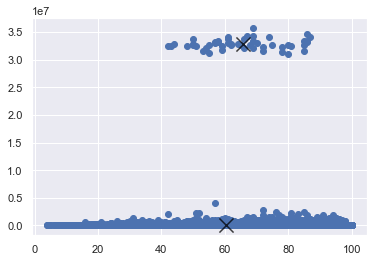

In [8]:

plt.scatter(rotten_np[:,0], rotten_np[:,1])
plt.scatter(km_centers_rotten[0][0], km_centers_rotten[0][1], c='black', marker="x", s=200, alpha=0.75)
plt.scatter(km_centers_rotten[1][0], km_centers_rotten[1][1], c='black', marker="x", s=200, alpha=0.75)
plt.show()

# sklearn's Built-in Meanshifting Clustering Algorithm

In [9]:
#attempts use meanshift with scaled data


# Start the timer: 
start_time = time.time()

# Specify and fit the model
ms = MeanShift(bandwidth = 0.20)
ms.fit(rotten_norm)

# Stop the clock and determine the length of time
stop_time = time.time()

print("This took %s seconds to run" % (stop_time-start_time))


labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)
print(len(cluster_centers))




This took 636.8672199249268 seconds to run
[[0.69787426 0.00127158]
 [0.61804878 0.91682927]]
2


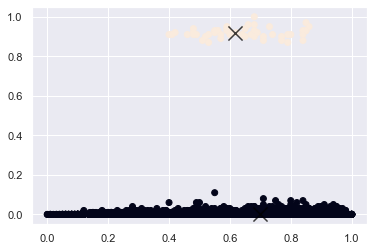

In [10]:
plt.scatter(rotten_norm[:,0], rotten_norm[:,1], c = labels)
plt.scatter(cluster_centers[0][0], cluster_centers[0][1], c='black', marker="x", s=200, alpha=0.75)
plt.scatter(cluster_centers[1][0], cluster_centers[1][1], c='black', marker="x", s=200, alpha=0.75)
plt.show()

# My Meanshifting Clustering Algorithm

In [17]:
#time analysis for meanshift clustering

%lprun -f meanshifting_clustering meanshifting_clustering(rotten_norm, 0.2, False, 0, 10)



In [12]:
#memory analysis for meanshift clustering

%memit meanshifting_clustering(rotten_norm, 0.2, False, 0, 10)


peak memory: 161.82 MiB, increment: 0.02 MiB


In [13]:
#time analysis for meanshifting

%lprun -f meanshifting meanshifting(rotten_norm, 0.2, False, 0)


In [14]:
#memory analysis for meanshift clustering

%memit meanshifting(rotten_norm, 0.2, False, 0)


peak memory: 161.85 MiB, increment: 0.01 MiB


In [15]:
ms_centers = meanshifting_clustering(rotten_norm, 0.2, False, 0, 10)
print(ms_centers)

[array([0.68834638, 0.00124682]), array([0.72216387, 0.00133209]), array([0.67856664, 0.00124848])]


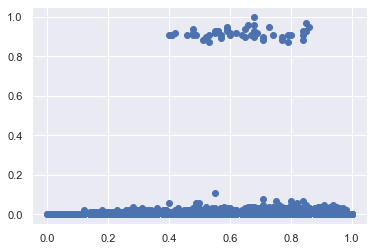

In [16]:

plt.scatter(rotten_norm[:,0], rotten_norm[:,1])
plt.show()